# Declare Filename

In [5]:
!ls Week-2-UNIXDataFiles/

fruits.txt  Icon  shakespeare.txt


In [7]:
filename = './Week-2-UNIXDataFiles/shakespeare.txt'
!echo $filename
print(filename)

./Week-2-UNIXDataFiles/shakespeare.txt
./Week-2-UNIXDataFiles/shakespeare.txt


# head

In [9]:
!head -n 3 $filename

# tail

In [14]:
!tail -n 30 $filename

# wc

In [11]:
!wc ./Week-2-UNIXDataFiles/shakespeare.txt

 124505  901447 5583442 ./Week-2-UNIXDataFiles/shakespeare.txt


In [12]:
!wc -l $filename

124505 ./Week-2-UNIXDataFiles/shakespeare.txt


# cat

In [16]:
!cat $filename | wc -l

124505


# grep

In [17]:
!grep -i 'parchment' $filename

In [18]:
#output matching pattern one per line and then count number of lines

!cat $filename | grep -o 'liberty' | wc -l

71


# sed

In [19]:
# replace all instance of 'parchment' to 'manuscript'

!sed -e 's/parchment/manuscript/g' $filename > temp.txt

In [20]:
!grep -i 'manuscript' temp.txt

In [21]:
# sort

In [22]:
# sort

!head -n 5 $filename

In [24]:
!head -n 5 $filename | sort

In [25]:
# columns separated by ' ', sort on column 2 (-k2), case insensitive (-f)

!head -n 5 $filename | sort -f -t' ' -k2

In [26]:
!sort $filename | wc -l

124505


In [28]:
# uniq command for getting unique records using -u option

!sort $filename | uniq -u | wc -l

110834


# Let's bring it all together

## Count most frequent words in the text using UNIX

In [31]:
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -15

 502289 $
  22678 the$
  19163 I$
  17868 and$
  15324 to$
  15216 of$

  12152 a$
  10614 my$
   9347 in$
   8709 you$
   7662 is$
   7332 that$
   7065 And$
   6737 not$
sort: write failed: 'standard output': Broken pipe
sort: write error


In [35]:
# head stops after 15 lines, hence 'sort' command is sending the last two errors

## Write the output to a file

In [33]:
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -15 > count_vs_words

sort: write failed: 'standard output': Broken pipe
sort: write error


In [34]:
!cat count_vs_words

 502289 $
  22678 the$
  19163 I$
  17868 and$
  15324 to$
  15216 of$

  12152 a$
  10614 my$
   9347 in$
   8709 you$
   7662 is$
   7332 that$
   7065 And$
   6737 not$


## Plot by importing word counts into Python

In [36]:
%matplotlib inline

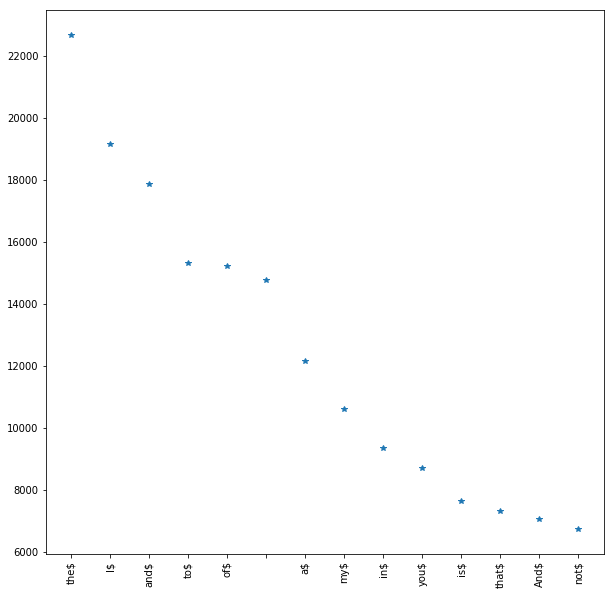

In [38]:
import matplotlib.pyplot as plt
import csv

xTicks = []
y = []

with open('count_vs_words', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))
        
# remove the count of spaces (first line)
y = y[1:]
xTicks = xTicks[1:]
# plot
x = range(len(y))
plt.figure(figsize=(10, 10))
plt.xticks(x, xTicks, rotation=90) # xlabel with 90 degree angle
plt.plot(x, y, '*')
plt.show()
                     